In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
games = pd.read_csv('./games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46068 entries, 0 to 46067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          46068 non-null  int64  
 1   title           46068 non-null  object 
 2   date_release    46068 non-null  object 
 3   win             46068 non-null  bool   
 4   mac             46068 non-null  bool   
 5   linux           46068 non-null  bool   
 6   rating          46068 non-null  object 
 7   positive_ratio  46068 non-null  int64  
 8   user_reviews    46068 non-null  int64  
 9   price_final     46068 non-null  float64
 10  price_original  46068 non-null  float64
 11  discount        46068 non-null  float64
 12  steam_deck      46068 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.3+ MB


In [4]:
games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
5,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
7,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
8,261550,Mount & Blade II: Bannerlord,2022-10-25,True,False,False,Very Positive,87,169694,49.99,49.99,0.0,True
9,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True


In [5]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [6]:
os_type = games[['win', 'mac', 'linux']].sum().reset_index()

In [7]:
os_type = os_type.rename(columns = {'index': 'type', 0: 'count'})

In [8]:
os_type

,type,count
0,win,45379
1,mac,12171
2,linux,8442


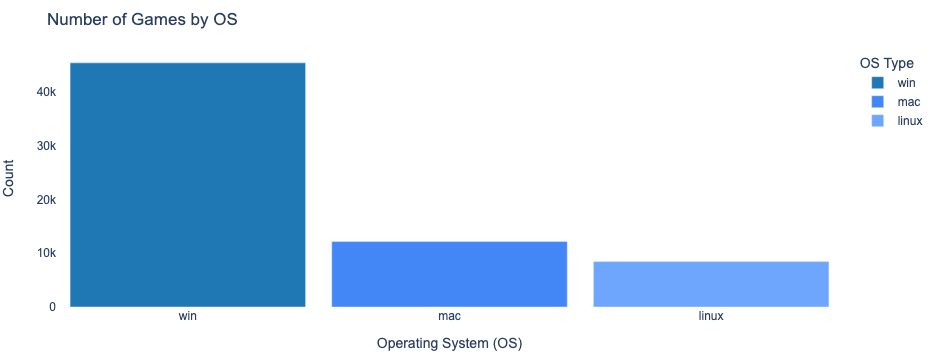

In [114]:
import plotly.express as px

blue_shades = ["#1f77b4", "#4287f5", "#6ea6fd", "#9ecdfb"]  # Different shades of blue

fig = px.bar(os_type, x='type', y='count', color='type', color_discrete_sequence=blue_shades)


fig.update_layout(
    title='Number of Games by OS',
    xaxis_title='Operating System (OS)',
    yaxis_title='Count',
    legend_title='OS Type',  
    font=dict(family='Arial', size=12),  
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    bargap=0.1,  
    margin=dict(l=50, r=50, t=50, b=50)  
)

fig.show()

In [10]:
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.606800e+04,46068.000000,4.606800e+04,46068.000000,46068.000000,46068.000000
mean,9.864431e+05,76.757988,1.843201e+03,8.750796,9.299008,5.185291
std,5.670487e+05,18.195317,3.908656e+04,11.364319,11.668360,18.190569
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.017228e+05,66.000000,2.000000e+01,1.382500,1.990000,0.000000
50%,9.162850e+05,81.000000,5.300000e+01,4.990000,5.990000,0.000000
75%,1.422158e+06,91.000000,2.260000e+02,11.990000,12.990000,0.000000
max,2.319990e+06,100.000000,6.941137e+06,299.990000,299.990000,90.000000


In [11]:
games_reviews = games[['title', 'user_reviews']]

In [12]:
games_reviews.sort_values(by = ['user_reviews'], ascending = False).head(10).reset_index()

,index,title,user_reviews
0,19041,Counter-Strike: Global Offensive,6941137
1,19489,PUBG: BATTLEGROUNDS,2142372
2,8746,Dota 2,1930493
3,5347,Grand Theft Auto V,1367837
4,19473,Tom Clancy's Rainbow Six® Siege,939992
5,9811,Team Fortress 2,935635
6,7342,Terraria,867226
7,2335,Garry's Mod,795170
8,3764,Rust,722973
9,7155,The Witcher® 3: Wild Hunt,640996


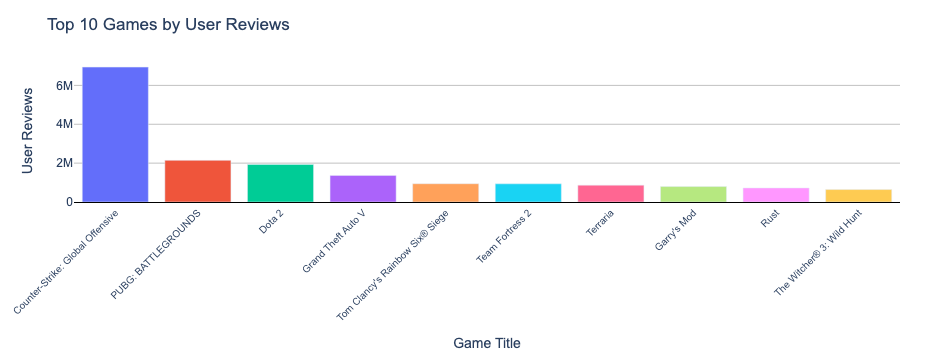

In [113]:
fig = px.bar(games_reviews.sort_values(by = ['user_reviews'], ascending = False).head(10), x='title', y='user_reviews', color = 'title')

fig.update_layout(
    title='Top 10 Games by User Reviews',
    xaxis_title='Game Title',
    yaxis_title='User Reviews',
    font=dict(family='Arial', size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=40, t=60, b=40),
    xaxis_tickangle=-45,  
    showlegend=False 
)

fig.update_xaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()


In [14]:
reco = pd.read_csv('./recommendations.csv')

In [15]:
reco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072270 entries, 0 to 10072269
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 547.5+ MB


In [16]:
reco.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07
mean,6.219670e+05,3.287714e+00,1.161575e+00,1.585668e+02,2.986138e+06,5.036134e+06
std,4.830838e+05,5.683120e+01,4.119607e+01,2.153311e+02,1.663607e+06,2.907614e+06
min,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.647100e+05,0.000000e+00,0.000000e+00,1.960000e+01,1.594016e+06,2.518067e+06
50%,4.319600e+05,0.000000e+00,0.000000e+00,6.330000e+01,3.032317e+06,5.036134e+06
75%,1.057090e+06,0.000000e+00,0.000000e+00,2.011000e+02,4.439388e+06,7.554202e+06
max,2.208920e+06,3.621200e+04,2.808800e+04,9.999000e+02,5.810793e+06,1.007227e+07


In [17]:
reco.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,19954,0
1,304390,4,0,2017-02-17,False,11.5,1098,1
2,1085660,2,0,2019-11-17,True,336.5,91207,2
3,703080,0,0,2022-09-23,True,27.4,93054,3
4,526870,0,0,2021-01-10,True,7.9,9106,4


In [18]:
reco_values = reco['is_recommended'].value_counts().reset_index()

In [19]:
reco_values

,index,is_recommended
0,True,8599822
1,False,1472448


In [20]:
reco_values['reco'] = np.where((reco_values['index'] == True), 'Yes', 'No')

In [21]:
reco_values

,index,is_recommended,reco
0,True,8599822,Yes
1,False,1472448,No


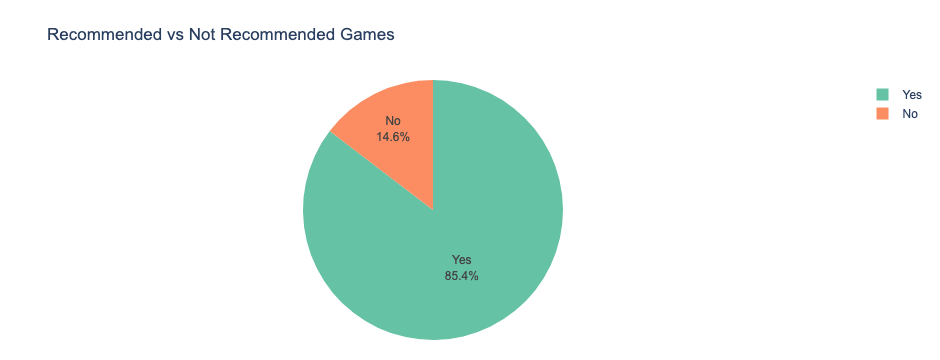

In [98]:
import plotly.graph_objects as go

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

fig = go.Figure(data=go.Pie(labels=reco_values.reco, values=reco_values.is_recommended, textinfo='percent+label'))

fig.update_layout(
    title='Recommended vs Not Recommended Games',
    font=dict(family='Arial', size=12), 
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    margin=dict(l=20, r=20, t=80, b=20),  
)

fig.update_traces(marker=dict(colors=colors))

fig.update_traces(hoverinfo='label+percent+value')

fig.show()

In [23]:
review_type = reco[['helpful', 'funny']].sum().reset_index(name = 'count').rename(columns = {'index': 'label'})

In [24]:
review_type

,label,count
0,helpful,33114746
1,funny,11699702


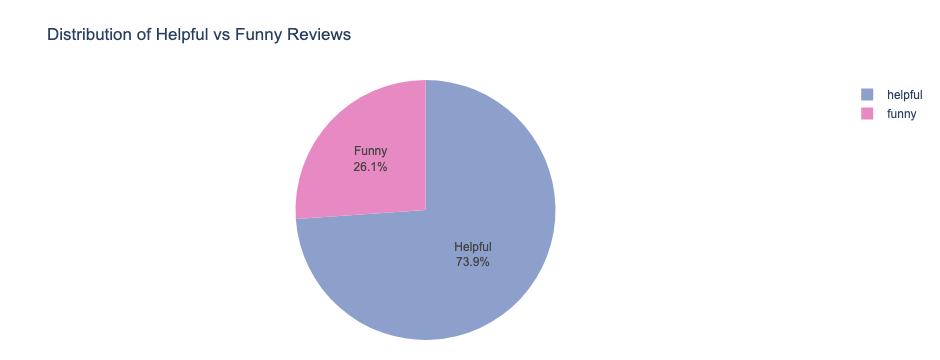

In [115]:
colors = ['#8da0cb', '#e78ac3']

fig = go.Figure(data=go.Pie(labels=review_type['label'], values=review_type['count']))

fig.update_layout(
    title='Distribution of Helpful vs Funny Reviews',
    font=dict(family='Arial', size=12),  
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    margin=dict(l=20, r=20, t=80, b=20),  
)

fig.update_traces(marker=dict(colors=colors))

fig.update_traces(hoverinfo='label+percent+value')


labels = ['Helpful', 'Funny']
fig.update_traces(text=labels)

fig.show()

In [26]:
users = pd.read_csv('./users.csv')

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810794 entries, 0 to 5810793
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 133.0 MB


In [28]:
users.describe()

,user_id,products,reviews
count,5.810794e+06,5.810794e+06,5.810794e+06
mean,2.905396e+06,1.322544e+02,1.733372e+00
std,1.677432e+06,2.623620e+02,1.999447e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.452698e+06,2.300000e+01,1.000000e+00
50%,2.905396e+06,6.200000e+01,1.000000e+00
75%,4.358095e+06,1.510000e+02,2.000000e+00
max,5.810793e+06,2.930800e+04,1.510000e+02


In [29]:
users.head(10)

,user_id,products,reviews
0,5693478,156,1
1,3595958,329,3
2,1957593,176,2
3,2108293,98,2
4,2329878,144,2
5,3264015,108,1
6,3863136,229,1
7,4098027,187,1
8,4269643,1824,2
9,4473335,12,1


In [30]:
users.corr()

,user_id,products,reviews
user_id,1.000000,0.102232,0.041728
products,0.102232,1.000000,0.204753
reviews,0.041728,0.204753,1.000000


In [31]:
metadata = pd.read_json('games_metadata.json', lines = True)

In [32]:
metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50559,2351804,,"[Casual, Simulation]"
50560,2459810,,"[Action, Casual, Sports]"
50561,1998970,,[Simulation]
50562,1616110,"It’s a normal day on the net, until a virus ou...","[Action, Shooter, Looter Shooter, Shoot 'Em Up..."


In [87]:
metadata_expand = metadata.explode('tags')

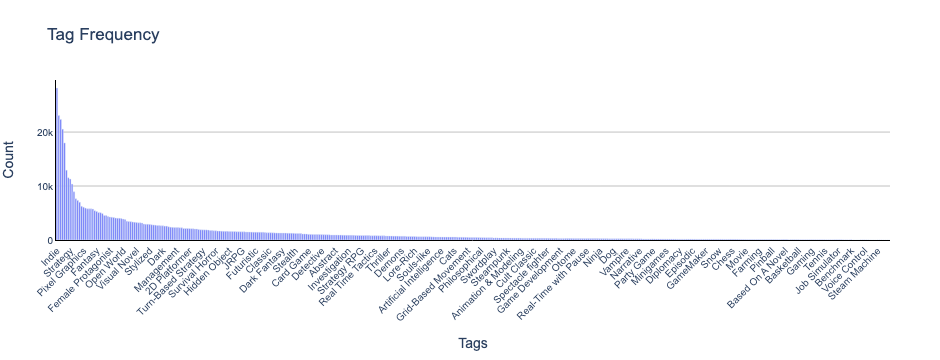

In [112]:
tag_counts = metadata_expand['tags'].value_counts().reset_index()
tag_counts.columns = ['tags', 'count']

fig = px.bar(tag_counts, x='tags', y='count', title='Tag Frequency')

fig.update_layout(
    xaxis_title='Tags',
    yaxis_title='Count',
    font=dict(family='Arial', size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=False  
)

fig.update_xaxes(tickangle=-45, tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black', showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()

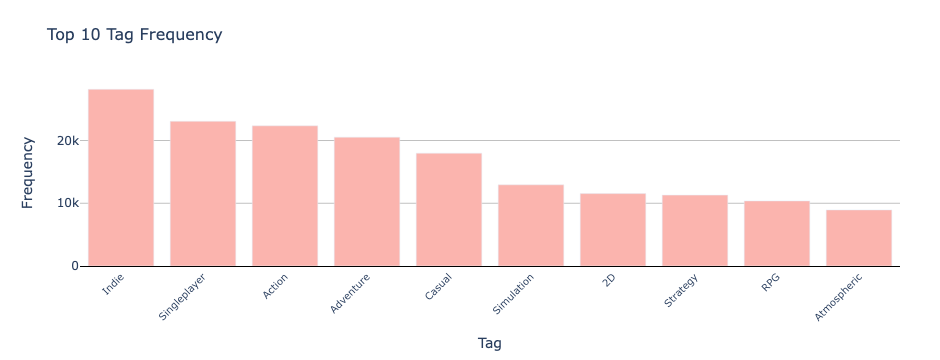

In [111]:
top_10_tags = tag_counts.head(10)

fig = px.bar(top_10_tags, x='tags', y='count', 
             title='Top 10 Tag Frequency', 
             labels={'tags': 'Tag', 'count': 'Frequency'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title_font=dict(size=16), 
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=80, r=40, t=80, b=30),  
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    showlegend=False  
)

fig.update_xaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()

**Merge metadata and games dataframes on 'app_id'**

In [33]:
meta_games = pd.merge(metadata, games, on = 'app_id')

meta_games

,app_id,description,tags,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,,[Action],BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46063,2231450,Pizza Tower is a fast paced 2D platformer insp...,"[Great Soundtrack, 2D Platformer, Fast-Paced, ...",Pizza Tower,2023-01-26,True,False,False,Overwhelmingly Positive,99,4737,19.99,19.99,0.0,True
46064,2235540,,"[Action, Gore, Violent]",For Honor® Afeera Hero,2023-02-02,True,False,False,Very Positive,82,78,7.99,7.99,0.0,True
46065,2239550,Build a resistance as you fight to take back a...,"[Action, Adventure, Open World, Shooter, Multi...",Watch Dogs®: Legion,2023-01-26,True,False,False,Mixed,56,1535,59.99,59.99,0.0,True
46066,2241030,,"[Indie, Adventure, Simulation]",Don't Starve Together: Starter Pack 2023,2022-12-22,True,True,True,Positive,100,13,7.99,7.99,0.0,True


In [34]:
meta_games.drop(['description'], axis = 1, inplace = True)

In [35]:
meta_games_sorted = meta_games.sort_values('user_reviews', ascending = False)

meta_games_sorted

,app_id,tags,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
44174,730,"[FPS, Shooter, Multiplayer, Competitive, Actio...",Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,6941137,14.99,0.00,0.0,True
44800,578080,"[Survival, Shooter, Battle Royale, Multiplayer...",PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,Mixed,57,2142372,0.00,0.00,0.0,True
44172,570,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",Dota 2,2013-07-09,True,True,True,Very Positive,82,1930493,0.00,0.00,0.0,True
44425,271590,"[Open World, Action, Multiplayer, Crime, Autom...",Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,85,1367837,0.00,0.00,0.0,True
44538,359550,"[FPS, PvP, eSports, Shooter, Multiplayer, Tact...",Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,87,939992,19.99,19.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27568,295650,"[Action, Indie, Adventure]",Streng Check,2019-03-27,True,False,False,Mostly Negative,30,10,0.54,0.99,45.0,True
27581,399834,"[Strategy, Action, Indie]",Awesomenauts - Rockstar Announcer,2015-12-02,True,True,True,Positive,100,10,3.49,3.49,0.0,True
27592,533558,[Action],DEAD OR ALIVE 5 Last Round: Core Fighters Add ...,2015-03-30,True,False,False,Mixed,60,10,0.99,0.99,0.0,True
16632,1579300,"[Visual Novel, Interactive Fiction, Female Pro...",Birb Café,2022-05-12,True,False,True,Positive,90,10,9.99,9.99,0.0,True


**Decided to focus on indie games, so I pulled the top 10 indie games with the most reviews**

In [36]:
indie_games = meta_games_sorted[meta_games_sorted['tags'].apply(lambda tags: any(tag.lower().find('indie') != -1 for tag in tags))]

indie_games

,app_id,tags,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
44281,105600,"[Open World Survival Craft, Sandbox, Survival,...",Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True
44185,4000,"[Sandbox, Multiplayer, Funny, Moddable, Buildi...",Garry's Mod,2006-11-29,True,True,True,Overwhelmingly Positive,96,795170,9.99,9.99,0.0,True
44397,252490,"[Survival, Crafting, Multiplayer, Open World, ...",Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,39.99,0.0,True
44647,431960,"[Mature, Utilities, Software, Anime, Design & ...",Wallpaper Engine,2018-11-01,True,False,False,Overwhelmingly Positive,98,572319,3.99,3.99,0.0,True
44478,304930,"[Free to Play, Survival, Zombies, Multiplayer,...",Unturned,2017-07-07,True,True,True,Very Positive,91,504808,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,2168564,"[Strategy, RPG, Indie, Casual]",TROUBLESHOOTER: Abandoned Children - Heixing's...,2022-10-21,True,False,False,Positive,90,10,3.99,3.99,0.0,True
42857,867510,"[Casual, Action, Indie, Puzzle]",PHOTON CUBE,2018-06-27,True,False,False,Positive,100,10,6.99,6.99,0.0,True
27568,295650,"[Action, Indie, Adventure]",Streng Check,2019-03-27,True,False,False,Mostly Negative,30,10,0.54,0.99,45.0,True
27581,399834,"[Strategy, Action, Indie]",Awesomenauts - Rockstar Announcer,2015-12-02,True,True,True,Positive,100,10,3.49,3.49,0.0,True


In [37]:
indie_games_tags = indie_games[['app_id','tags']].explode('tags')

indie_games_tags

,app_id,tags
44281,105600,Open World Survival Craft
44281,105600,Sandbox
44281,105600,Survival
44281,105600,2D
44281,105600,Multiplayer
...,...,...
33204,525600,Adventure
33204,525600,Indie
33204,525600,Casual
33204,525600,Platformer


In [38]:
indie_games_tags.nunique()

app_id    26022
tags        440
dtype: int64

In [39]:
indie_games_tags_top_10 = indie_games_tags['tags'].value_counts().sort_values(ascending = False).head(10).reset_index()

indie_games_tags_top_10

,index,tags
0,Indie,26022
1,Singleplayer,13255
2,Adventure,12014
3,Action,11691
4,Casual,11374
5,2D,6956
6,Simulation,6214
7,Strategy,5884
8,RPG,5354
9,Puzzle,4936


In [40]:
indie_games_tags = indie_games_tags[indie_games_tags['tags'].isin(indie_games_tags_top_10['index'])]

indie_games_tags

,app_id,tags
44281,105600,2D
44281,105600,Adventure
44281,105600,Indie
44281,105600,Action
44281,105600,RPG
...,...,...
27581,399834,Action
27581,399834,Indie
33204,525600,Adventure
33204,525600,Indie


In [41]:
indie_games.drop(['tags'], axis = 1, inplace = True)

/var/folders/s8/0h115_k94jl60npnqn25h9hm0000gn/T/ipykernel_81032/3390434959.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
indie_games = pd.merge(indie_games, indie_games_tags, on = 'app_id')

**Created an Indie Games table**

In [43]:
indie_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True,2D
1,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True,Adventure
2,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True,Indie
3,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True,Action
4,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,9.99,0.0,True,RPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103695,399834,Awesomenauts - Rockstar Announcer,2015-12-02,True,True,True,Positive,100,10,3.49,3.49,0.0,True,Action
103696,399834,Awesomenauts - Rockstar Announcer,2015-12-02,True,True,True,Positive,100,10,3.49,3.49,0.0,True,Indie
103697,525600,Dyno Adventure,2016-09-26,True,False,False,Mixed,40,10,0.99,0.99,0.0,True,Adventure
103698,525600,Dyno Adventure,2016-09-26,True,False,False,Mixed,40,10,0.99,0.99,0.0,True,Indie


**Merged with recommendation table to get user_ids**

In [44]:
indie_reco = pd.merge(indie_games, reco, on= 'app_id')

indie_reco

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,discount,steam_deck,tags,helpful,funny,date,is_recommended,hours,user_id,review_id
0,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,...,0.0,True,2D,0,0,2022-07-14,True,153.8,1051188,106
1,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,...,0.0,True,2D,2,0,2016-10-09,True,528.3,1820315,130
2,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,...,0.0,True,2D,0,0,2016-04-23,True,698.4,2963808,165
3,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,...,0.0,True,2D,0,0,2021-11-08,True,790.7,1456538,399
4,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,867226,9.99,...,0.0,True,2D,0,0,2021-07-13,True,194.2,4314327,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117200,1709900,Tower Tactics: Liberation,2023-02-06,True,False,False,Very Positive,92,673,12.99,...,0.0,True,Indie,4,0,2022-12-11,True,18.7,4404429,9990036
16117201,1709900,Tower Tactics: Liberation,2023-02-06,True,False,False,Very Positive,92,673,12.99,...,0.0,True,Indie,0,0,2022-02-01,True,8.5,3029954,9990037
16117202,1709900,Tower Tactics: Liberation,2023-02-06,True,False,False,Very Positive,92,673,12.99,...,0.0,True,Indie,0,0,2022-06-30,True,63.8,4543329,9990038
16117203,1709900,Tower Tactics: Liberation,2023-02-06,True,False,False,Very Positive,92,673,12.99,...,0.0,True,Indie,0,0,2022-08-23,True,12.8,1694281,9990039


In [45]:
#Group by 'review_id' to determine the top 10 most reviewed indie games 

indie_title_top_10 = indie_reco.groupby(['title'])['review_id'].nunique().sort_values(ascending = False).reset_index().head(10)

In [46]:
indie_reco_top_10 = indie_reco[indie_reco['title'].isin(indie_title_top_10['title'])]

indie_reco_top_10 #Top 10 Indie games based on amount of reviews in data set

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,discount,steam_deck,tags,helpful,funny,date,is_recommended,hours,user_id,review_id
467560,252490,Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,...,0.0,True,Adventure,0,0,2020-04-22,True,0.4,431850,44
467561,252490,Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,...,0.0,True,Adventure,0,0,2022-01-03,False,53.4,542832,65
467562,252490,Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,...,0.0,True,Adventure,0,0,2022-10-10,True,75.8,1876452,132
467563,252490,Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,...,0.0,True,Adventure,0,0,2019-06-27,True,698.9,2012417,136
467564,252490,Rust,2018-02-08,True,True,False,Very Positive,87,722973,39.99,...,0.0,True,Adventure,0,0,2021-09-10,True,151.8,5305703,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729394,244850,Space Engineers,2019-02-28,True,False,False,Very Positive,89,78863,19.99,...,0.0,True,Adventure,0,0,2019-09-05,True,24.8,2530125,6126334
8729395,244850,Space Engineers,2019-02-28,True,False,False,Very Positive,89,78863,19.99,...,0.0,True,Adventure,0,0,2021-05-13,True,548.6,3154159,6126350
8729396,244850,Space Engineers,2019-02-28,True,False,False,Very Positive,89,78863,19.99,...,0.0,True,Adventure,0,0,2013-11-12,True,712.3,1878997,6126591
8729397,244850,Space Engineers,2019-02-28,True,False,False,Very Positive,89,78863,19.99,...,0.0,True,Adventure,2,0,2016-08-03,True,86.1,2677441,6126615


In [47]:
indie_reco_top_10.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'tags', 'helpful', 'funny', 'date',
       'is_recommended', 'hours', 'user_id', 'review_id'],
      dtype='object')

In [48]:
features = ['app_id', 'title', 'steam_deck', 'tags', 'helpful', 'funny', 'date',
       'is_recommended', 'hours', 'user_id']

In [49]:
df = indie_reco_top_10[features]

df.head()

,app_id,title,steam_deck,tags,helpful,funny,date,is_recommended,hours,user_id
467560,252490,Rust,True,Adventure,0,0,2020-04-22,True,0.4,431850
467561,252490,Rust,True,Adventure,0,0,2022-01-03,False,53.4,542832
467562,252490,Rust,True,Adventure,0,0,2022-10-10,True,75.8,1876452
467563,252490,Rust,True,Adventure,0,0,2019-06-27,True,698.9,2012417
467564,252490,Rust,True,Adventure,0,0,2021-09-10,True,151.8,5305703


In [50]:
df.shape

(4758627, 10)

In [51]:
title_dummies = pd.get_dummies(df.title, prefix = 'title')

title_dummies

,title_Brawlhalla,title_Kerbal Space Program,title_No Man's Sky,title_RimWorld,title_Rust,title_Satisfactory,title_Slay the Spire,title_Space Engineers,title_The Binding of Isaac: Rebirth,title_Wallpaper Engine
467560,0,0,0,0,1,0,0,0,0,0
467561,0,0,0,0,1,0,0,0,0,0
467562,0,0,0,0,1,0,0,0,0,0
467563,0,0,0,0,1,0,0,0,0,0
467564,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8729394,0,0,0,0,0,0,0,1,0,0
8729395,0,0,0,0,0,0,0,1,0,0
8729396,0,0,0,0,0,0,0,1,0,0
8729397,0,0,0,0,0,0,0,1,0,0


In [52]:
tags_dummies = pd.get_dummies(df.tags, prefix = 'tag')

tags_dummies

,tag_2D,tag_Action,tag_Adventure,tag_Casual,tag_Indie,tag_RPG,tag_Simulation,tag_Singleplayer,tag_Strategy
467560,0,0,1,0,0,0,0,0,0
467561,0,0,1,0,0,0,0,0,0
467562,0,0,1,0,0,0,0,0,0
467563,0,0,1,0,0,0,0,0,0
467564,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8729394,0,0,1,0,0,0,0,0,0
8729395,0,0,1,0,0,0,0,0,0
8729396,0,0,1,0,0,0,0,0,0
8729397,0,0,1,0,0,0,0,0,0


In [53]:
df.isna().sum()

app_id            0
title             0
steam_deck        0
tags              0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
dtype: int64

In [54]:
print(df['is_recommended'].value_counts())

print(df['steam_deck'].value_counts())

True     4228578
False     530049
Name: is_recommended, dtype: int64
True    4758627
Name: steam_deck, dtype: int64


In [55]:
df['is_recommended'] = df['is_recommended'].astype(int)

/var/folders/s8/0h115_k94jl60npnqn25h9hm0000gn/T/ipykernel_81032/2982472250.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_dummies = pd.concat([df, title_dummies], axis = 1)

In [57]:
df_dummies = pd.concat([df_dummies, tags_dummies], axis = 1)

In [58]:
df_dummies = df_dummies.drop(['tags', 'title', 'steam_deck', 'date', 'app_id', 'user_id'], axis = 1)

In [59]:
df_dummies

,helpful,funny,is_recommended,hours,title_Brawlhalla,title_Kerbal Space Program,title_No Man's Sky,title_RimWorld,title_Rust,title_Satisfactory,...,title_Wallpaper Engine,tag_2D,tag_Action,tag_Adventure,tag_Casual,tag_Indie,tag_RPG,tag_Simulation,tag_Singleplayer,tag_Strategy
467560,0,0,1,0.4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
467561,0,0,0,53.4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
467562,0,0,1,75.8,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
467563,0,0,1,698.9,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
467564,0,0,1,151.8,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729394,0,0,1,24.8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8729395,0,0,1,548.6,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8729396,0,0,1,712.3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8729397,2,0,1,86.1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
X = df_dummies.drop(columns = ['is_recommended'])
y = df_dummies['is_recommended']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
numerical_features = ['helpful', 'funny', 'hours']

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [64]:
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled

In [65]:
X_train.shape

(3806901, 22)

## k-Nearest Neighbors model

In [66]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

In [67]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn_model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8929450282959591


In [70]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.28      0.37    105975
           1       0.92      0.97      0.94    845751

    accuracy                           0.89    951726
   macro avg       0.73      0.63      0.66    951726
weighted avg       0.87      0.89      0.88    951726

Confusion Matrix:
[[ 29890  76085]
 [ 25802 819949]]


## Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [72]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred_log = logreg.predict(X_test)

In [76]:
score = accuracy_score(y_test, y_pred_log)

print("The Logistic Regression accuracy is:", score)

The Logistic Regression accuracy is: 0.8886559787165634


In [77]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log)) 

## Predicted Negative | Predicted Positive
# Actual Negative: TN | FN
# Actual Positive: FP | TP
##########################################

Confusion Matrix:
[[    73 105902]
 [    67 845684]]


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Accuracy:", accuracy) # TP+TN/All Data
print("Precision:", precision) # TP/TP+FP
print("Recall:", recall) # TP/TP+FN
print("F1-Score:", f1) # 2*(Precision*Recall)/(Precision+Recall)

Accuracy: 0.8886559787165634
Precision: 0.8887100062422104
Recall: 0.9999207804661183
F1-Score: 0.9410411069265253


## Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = RandomForestClassifier(n_estimators=50, random_state=0)

In [82]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [83]:
y_pred_rf = clf.predict(X_test)

In [84]:
rf_score = accuracy_score(y_test, y_pred_rf)

print("The Random Forest accuracy is:", rf_score)

The Random Forest accuracy is: 0.8932896653028287


In [85]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

hours                                  0.624016
helpful                                0.183075
funny                                  0.052208
title_No Man's Sky                     0.039657
title_Rust                             0.023624
title_Brawlhalla                       0.021281
title_Wallpaper Engine                 0.015739
title_The Binding of Isaac: Rebirth    0.006310
title_RimWorld                         0.006230
title_Space Engineers                  0.005978
title_Slay the Spire                   0.005100
title_Satisfactory                     0.005087
title_Kerbal Space Program             0.003699
tag_2D                                 0.001671
tag_Casual                             0.001095
tag_Strategy                           0.001058
tag_Adventure                          0.000982
tag_Singleplayer                       0.000896
tag_Action                             0.000862
tag_Simulation                         0.000753
tag_Indie                              0

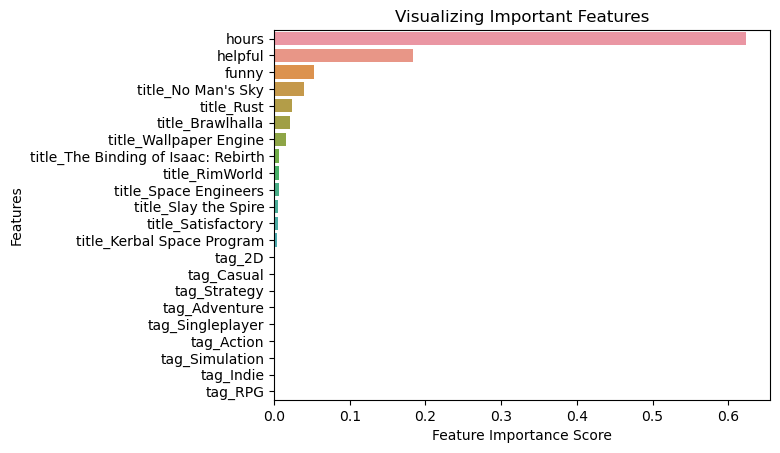

In [86]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()